### Graph of probe measures

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

model_df_filename = "/home/heather/GitHub/aldi0107/outputs/urchininf/mt_inf_sq/probe_data_model_df.json"
df = pd.read_json(model_df_filename)  # or however you load your DataFrame


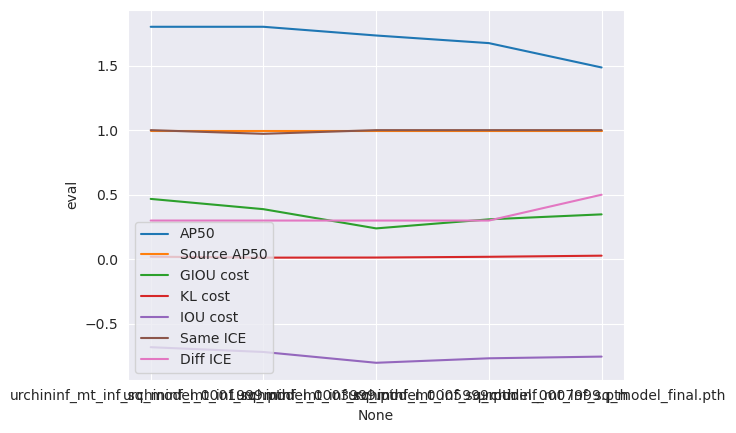

In [4]:
sns.lineplot(data=df, x=df.index, y='eval', label='AP50')
sns.lineplot(data=df, x=df.index, y='source_eval', label='Source AP50')
sns.lineplot(data=df, x=df.index, y='giou_cost_1', label='GIOU cost')
sns.lineplot(data=df, x=df.index, y='same_box_kl_cost_1', label='KL cost')
sns.lineplot(data=df, x=df.index, y='bos_iou_cost_1', label='IOU cost')
sns.lineplot(data=df, x=df.index, y='same_ice', label='Same ICE')
sns.lineplot(data=df, x=df.index, y='diff_ice', label='Diff ICE')

plt.show()